In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import gensim
from gensim.models.doc2vec import TaggedDocument
from gensim.test.utils import common_texts
import string

def preprocessing(raw):
    raw = "".join([s for s in raw if s in string.ascii_letters + string.digits + ' '])
    wordlist = nltk.word_tokenize(raw)
    text = [w.lower() for w in wordlist if w not in stopwords_en]
    return text

stopwords_en = stopwords.words("english")
n = 6
text = [""]*n

for i in range(0,n):
    text[i] = preprocessing(open(str(i+1) + '.txt', 'r', encoding = 'utf8').read())
    
word_set = set(text[0])
freqd_text = [""]*n
text_count_dict = [""]*n

for i in range(1,n):
    word_set = word_set.union(set(text[i]))

for i in range(0,n):
    freqd_text[i] = FreqDist(text[i])
    text_count_dict[i] = dict.fromkeys(word_set,0)
    for word in text[i]:
        text_count_dict[i][word] = freqd_text[i][word]

taggeddocs = []
doc = [""]*n

for i in range(0,n):
    doc[i] = TaggedDocument(words=text[i], tags=[u'NEWS_' + str(i+1)])
    taggeddocs.append(doc[i])

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(common_texts)]

#build the model
model = gensim.models.Doc2Vec(taggeddocs, dm=0, alpha=0.025, vector_size=20, min_alpha=0.025, min_count=0)

model.train(taggeddocs, total_examples=model.corpus_count, epochs=80)

prof_dist = { (i,j):0 for i in range(n) for j in range(n-1) }

for i in range(0,n):
    for j in range(0,n):
        prof_dist[i,j] = 1 - model.wv.n_similarity(text[i],text[j])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lieje\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lieje\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
prof_dist

{(0, 0): 0.0,
 (0, 1): 0.23819655179977417,
 (0, 2): 0.3176795244216919,
 (0, 3): 0.6138418614864349,
 (0, 4): 0.5135065913200378,
 (1, 0): 0.23819655179977417,
 (1, 1): 0.0,
 (1, 2): 0.4131985902786255,
 (1, 3): 0.5552542507648468,
 (1, 4): 0.5778239667415619,
 (2, 0): 0.3176795244216919,
 (2, 1): 0.4131985902786255,
 (2, 2): 0.0,
 (2, 3): 0.5611876547336578,
 (2, 4): 0.6055519580841064,
 (3, 0): 0.6138418614864349,
 (3, 1): 0.5552542507648468,
 (3, 2): 0.5611876547336578,
 (3, 3): 5.960464477539063e-08,
 (3, 4): 0.45576709508895874,
 (4, 0): 0.5135065913200378,
 (4, 1): 0.5778239667415619,
 (4, 2): 0.6055519580841064,
 (4, 3): 0.45576709508895874,
 (4, 4): 0.0,
 (5, 0): 0.8538363426923752,
 (5, 1): 0.8970391303300858,
 (5, 2): 1.0701327323913574,
 (5, 3): 0.5618630051612854,
 (5, 4): 0.477344274520874,
 (0, 5): 0.8538363426923752,
 (1, 5): 0.8970391303300858,
 (2, 5): 1.0701327323913574,
 (3, 5): 0.5618630051612854,
 (4, 5): 0.477344274520874,
 (5, 5): 0.0}

In [3]:
pca_input = [[0 for x in range(n)] for y in range(n)] 

for i in range(0,n):
    for j in range(0,n):
        pca_input[i][j] = prof_dist[i,j]

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(pca_input)
print(pca.components_)

[[ 0.42735839  0.42146481  0.51481359 -0.0944107  -0.14331597 -0.58757668]
 [ 0.31557228  0.21503877 -0.34940902 -0.82135959 -0.07458621  0.22779622]]


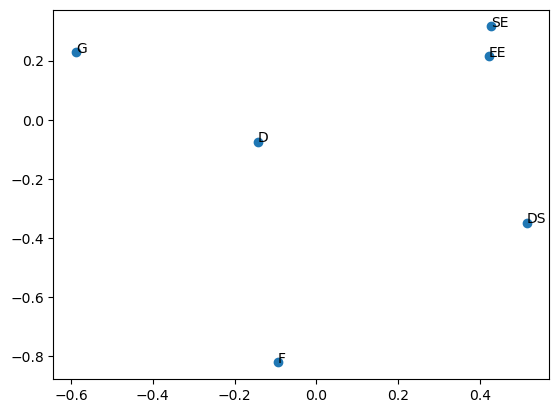

In [5]:
import matplotlib.pyplot as plt
x = pca.components_[0]
y = pca.components_[1]
n = ["SE","EE","DS","F","D", "G"]

fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))
